In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

Pearson's r: 0.6610161409165427, p-value: 0.0


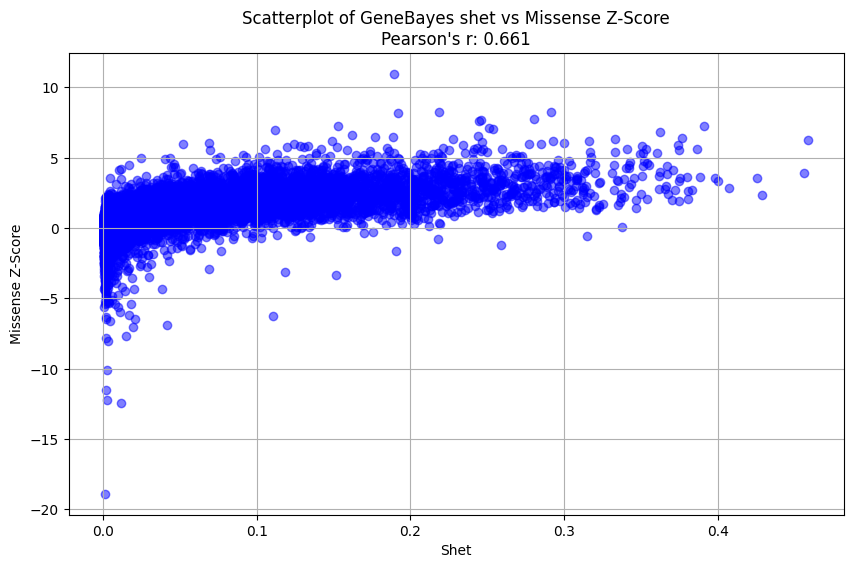

In [3]:
df = pd.read_csv("merged_output.tsv", delimiter ='\t')

df['gene_length'] = df['thickEnd'] - df['thickStart']
df['pLI'] = df['pLI_score'] / 1000

# Calculate Pearson's correlation coefficient
r_value, p_value = pearsonr(df['prior_mean'], df['_zscore'])
print(f"Pearson's r: {r_value}, p-value: {p_value}")

# GB(Prior) x zscore scatter plot

fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.scatter(df['prior_mean'], df['_zscore'], color='blue', alpha=0.5)
ax1.set_title(f'Scatterplot of GeneBayes shet vs Missense Z-Score\nPearson\'s r: {r_value:.3f}')
ax1.set_xlabel('Shet')
ax1.set_ylabel('Missense Z-Score')
ax1.grid(True)

GB_prior_missense = fig1

GB_prior_missense.canvas.draw()
plt.show()

Pearson's r: 0.5637926282005011, p-value: 0.0


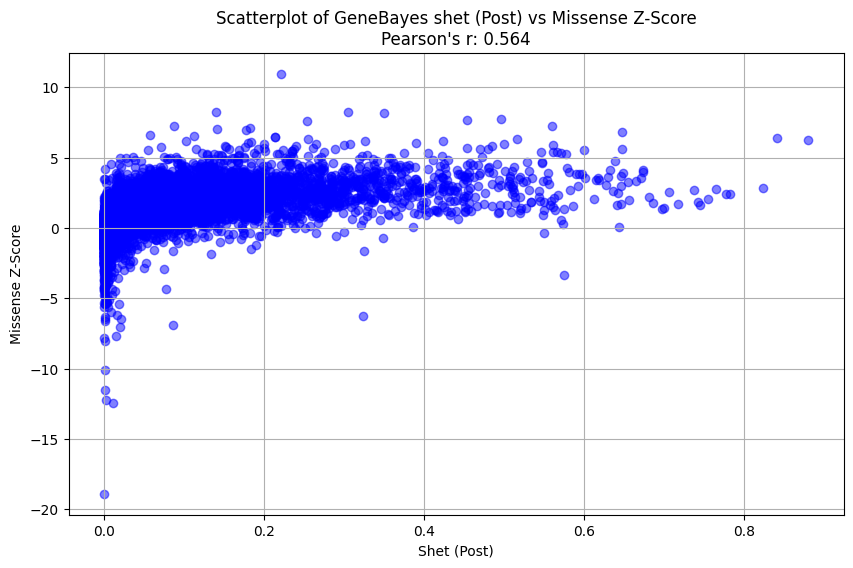

In [5]:
# GB(Post) x zscore scatter plot
r_value, p_value = pearsonr(df['post_mean'], df['_zscore'])
print(f"Pearson's r: {r_value}, p-value: {p_value}")

fig2, ax2 = plt.subplots(figsize=(10, 6))
ax2.scatter(df['post_mean'], df['_zscore'], color='blue', alpha=0.5)
ax2.set_title(f'Scatterplot of GeneBayes shet (Post) vs Missense Z-Score\nPearson\'s r: {r_value:.3f}')
ax2.set_xlabel('Shet (Post)')
ax2.set_ylabel('Missense Z-Score')
ax2.grid(True)

GB_post_missense = fig2

GB_post_missense.canvas.draw()
plt.show()

In [6]:
gene_name = 'PALB2'
filtered_df = df[df['symbol'].str.upper() == gene_name.upper()]

# Check if the gene was found
if filtered_df.empty:
    print(f"Gene '{symbol}' not found in the dataset.")
else:
    # Extract SHEt and HS values
    prior_value = filtered_df['prior_mean'].values[0]
    shet_value = filtered_df['post_mean'].values[0]
    hs_value = filtered_df['mean'].values[0]
    
    print(f"Gene: {gene_name}")
    print(f"Prior Mean: {prior_value}")
    print(f"SHEt Mean: {shet_value}")
    print(f"HS Mean: {hs_value}")

Gene: PALB2
Prior Mean: 0.00458839
SHEt Mean: 0.00237833
HS Mean: 0.0009010088168348


In [7]:
# clean for outliers
df_filtered = df[df['mean'] <= 1]
df = df_filtered

Pearson's r: 0.5169471611480606, p-value: 0.0


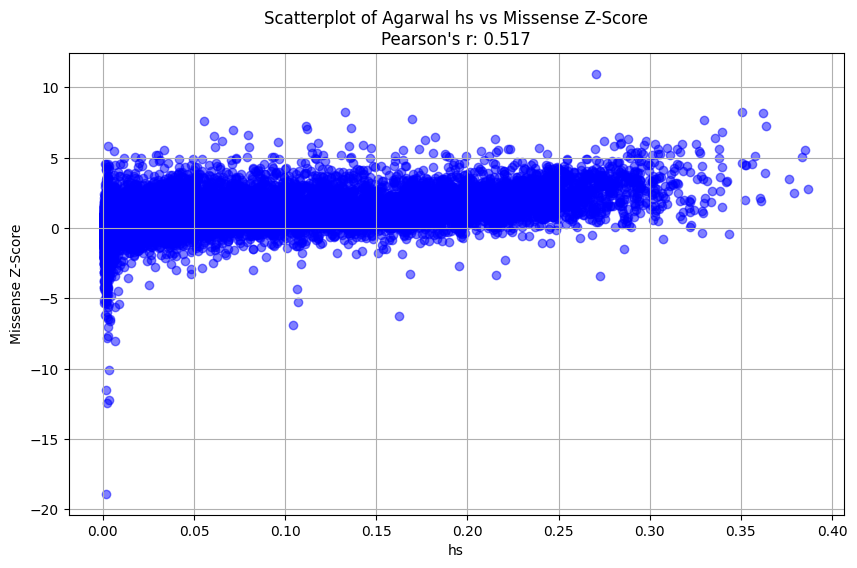

In [8]:
# Agarwal hs x zscore scatter plot
r_value, p_value = pearsonr(df['mean'], df['_zscore'])
print(f"Pearson's r: {r_value}, p-value: {p_value}")

fig3, ax3 = plt.subplots(figsize=(10, 6))
ax3.scatter(df['mean'], df['_zscore'], color='blue', alpha=0.5)
ax3.set_title(f'Scatterplot of Agarwal hs vs Missense Z-Score\nPearson\'s r: {r_value:.3f}')
ax3.set_xlabel('hs')
ax3.set_ylabel('Missense Z-Score')
ax3.grid(True)

Agarwal_missense = fig3

Agarwal_missense.canvas.draw()
plt.show()

In [141]:
filtered_df = sorted_filtered_df[['hgnc_id', 'symbol', 'post_mean', 'mean', 'mean_difference', '_zscore', 'pLI_score', 'thickStart', 'thickEnd', 'shet_pathogenic']]
filtered_df['gene_length'] = filtered_df['thickEnd'] - filtered_df['thickStart']
filtered_df['pLI'] = filtered_df['pLI_score'] / 1000
filtered_df.to_csv('focus_genes.tsv', sep='\t', index=False)

/var/folders/80/bplr3t355sl19sxgt1s4p27m0000gq/T/ipykernel_44950/522107984.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['gene_length'] = filtered_df['thickEnd'] - filtered_df['thickStart']
/var/folders/80/bplr3t355sl19sxgt1s4p27m0000gq/T/ipykernel_44950/522107984.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['pLI'] = filtered_df['pLI_score'] / 1000


Pearson's r: 0.09278479679606291, p-value: 2.289934620968507e-32


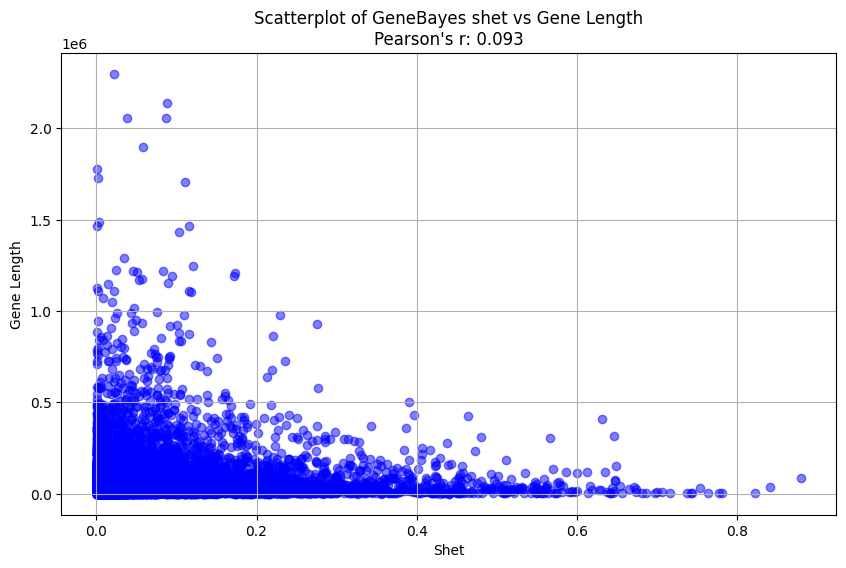

In [118]:
# Calculate Pearson's correlation coefficient
r_value, p_value = pearsonr(df['post_mean'], df['gene_length'])
print(f"Pearson's r: {r_value}, p-value: {p_value}")

# GB(Prior) x gene_length scatter plot

fig4, ax4 = plt.subplots(figsize=(10, 6))
ax4.scatter(df['post_mean'], df['gene_length'], color='blue', alpha=0.5)
ax4.set_title(f'Scatterplot of GeneBayes shet vs Gene Length\nPearson\'s r: {r_value:.3f}')
ax4.set_xlabel('Shet')
ax4.set_ylabel('Gene Length')
ax4.grid(True)

GB_post_length = fig4

GB_post_length.canvas.draw()
plt.show()

Pearson's r: 0.06615186779059473, p-value: 3.287122069668415e-17


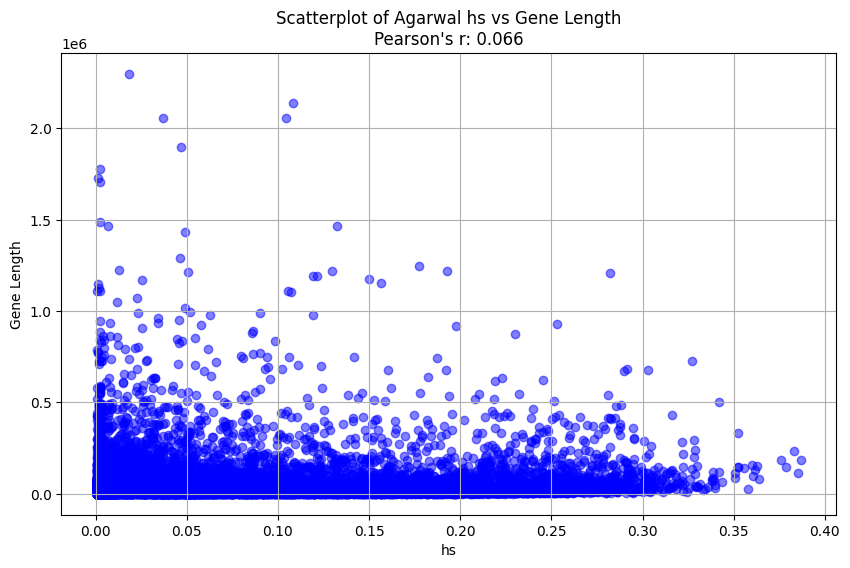

In [124]:
# Calculate Pearson's correlation coefficient
r_value, p_value = pearsonr(df['mean'], df['gene_length'])
print(f"Pearson's r: {r_value}, p-value: {p_value}")

# GB(Prior) x gene_length scatter plot

fig4, ax4 = plt.subplots(figsize=(10, 6))
ax4.scatter(df['mean'], df['gene_length'], color='blue', alpha=0.5)
ax4.set_title(f'Scatterplot of Agarwal hs vs Gene Length\nPearson\'s r: {r_value:.3f}')
ax4.set_xlabel('hs')
ax4.set_ylabel('Gene Length')
ax4.grid(True)

GB_post_length = fig4

GB_post_length.canvas.draw()
plt.show()

Pearson's r: 0.731405970199282, p-value: 0.0


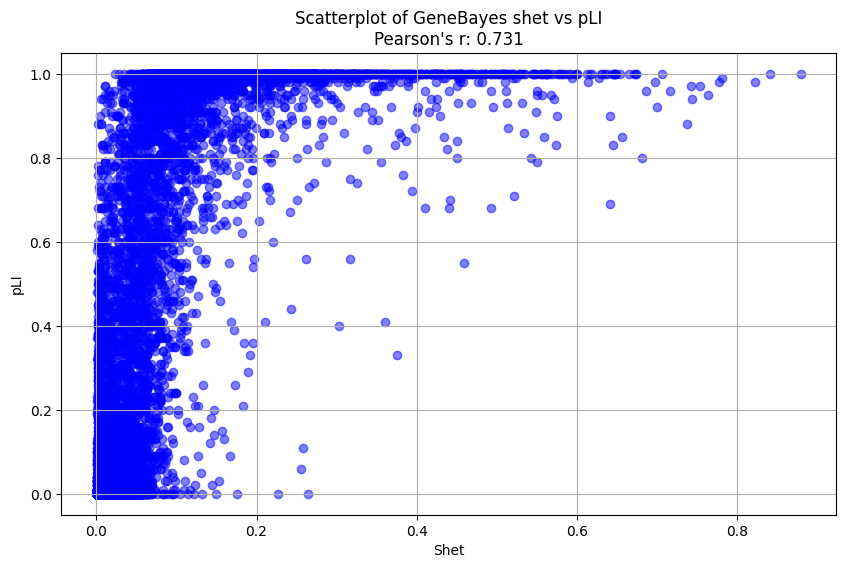

In [119]:
# Calculate Pearson's correlation coefficient
r_value, p_value = pearsonr(df['post_mean'], df['pLI'])
print(f"Pearson's r: {r_value}, p-value: {p_value}")

# GB(Prior) x gene_length scatter plot

fig4, ax4 = plt.subplots(figsize=(10, 6))
ax4.scatter(df['post_mean'], df['pLI'], color='blue', alpha=0.5)
ax4.set_title(f'Scatterplot of GeneBayes shet vs pLI\nPearson\'s r: {r_value:.3f}')
ax4.set_xlabel('Shet')
ax4.set_ylabel('pLI')
ax4.grid(True)

GB_post_length = fig4

GB_post_length.canvas.draw()
plt.show()

Pearson's r: 0.5155971496458782, p-value: 0.0


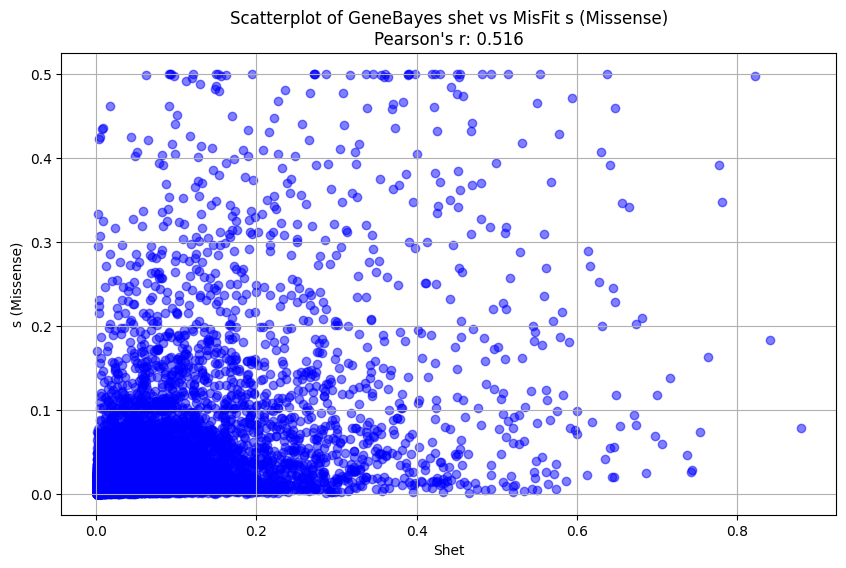

In [126]:
# Calculate Pearson's correlation coefficient
r_value, p_value = pearsonr(df_cleaned['post_mean'], df_cleaned['MisFit_sgene_mis'])
print(f"Pearson's r: {r_value}, p-value: {p_value}")

# GB(Prior) x gene_length scatter plot

fig5, ax5 = plt.subplots(figsize=(10, 6))
ax5.scatter(df_cleaned['post_mean'], df_cleaned['MisFit_sgene_mis'], color='blue', alpha=0.5)
ax5.set_title(f'Scatterplot of GeneBayes shet vs MisFit s (Missense)\nPearson\'s r: {r_value:.3f}')
ax5.set_xlabel('Shet')
ax5.set_ylabel('s (Missense)')
ax5.grid(True)

GB_post_length = fig5

GB_post_length.canvas.draw()
plt.show()

Pearson's r: 0.608451528235523, p-value: 0.0


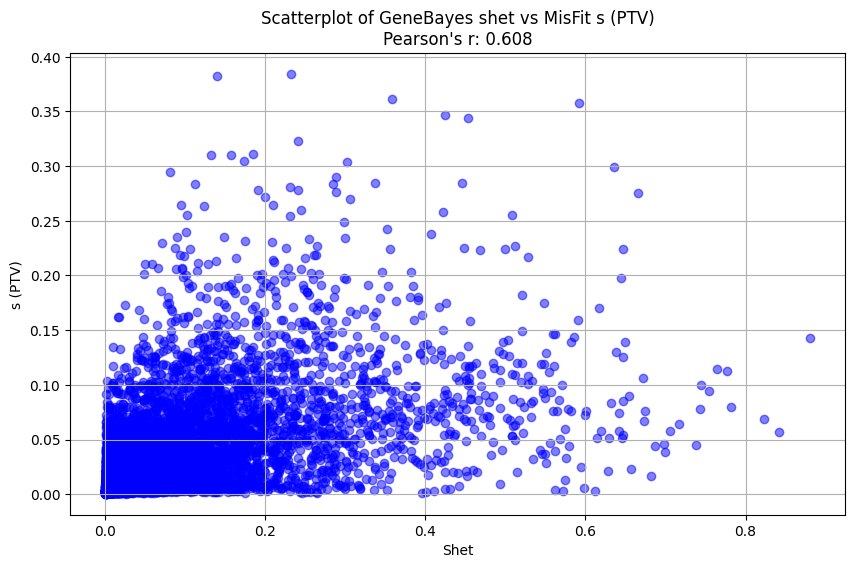

In [121]:
# Calculate Pearson's correlation coefficient
r_value, p_value = pearsonr(df_cleaned['post_mean'], df_cleaned['MisFit_sgene_ptv'])
print(f"Pearson's r: {r_value}, p-value: {p_value}")

# GB(Prior) x gene_length scatter plot

fig5, ax5 = plt.subplots(figsize=(10, 6))
ax5.scatter(df_cleaned['post_mean'], df_cleaned['MisFit_sgene_ptv'], color='blue', alpha=0.5)
ax5.set_title(f'Scatterplot of GeneBayes shet vs MisFit s (PTV)\nPearson\'s r: {r_value:.3f}')
ax5.set_xlabel('Shet')
ax5.set_ylabel('s (PTV)')
ax5.grid(True)

GB_post_length = fig5

GB_post_length.canvas.draw()
plt.show()

In [128]:
# clean for outliers
df_filtered = df_cleaned[df_cleaned['mean'] <= 1]
df_cleaned = df_filtered

Pearson's r: 0.5895018618877258, p-value: 0.0


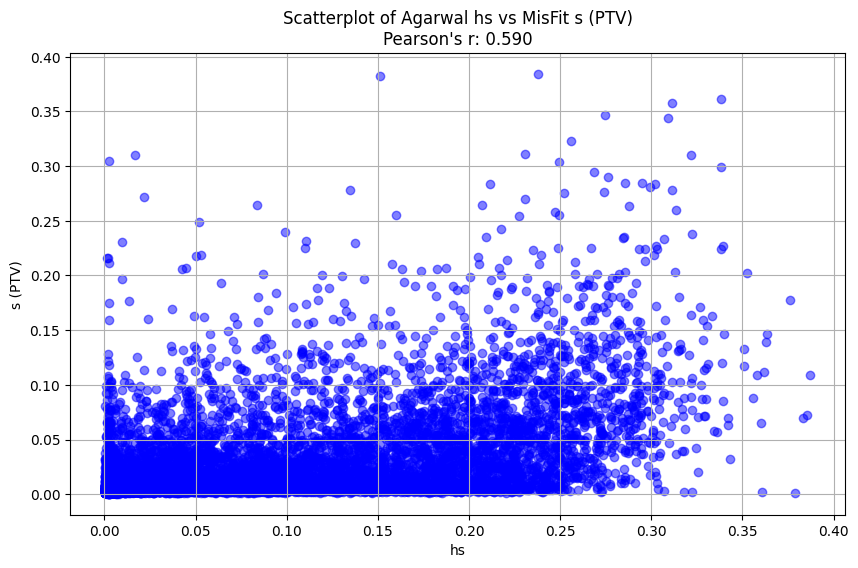

In [132]:
# Calculate Pearson's correlation coefficient
r_value, p_value = pearsonr(df_cleaned['mean'], df_cleaned['MisFit_sgene_ptv'])
print(f"Pearson's r: {r_value}, p-value: {p_value}")

# GB(Prior) x gene_length scatter plot

fig5, ax5 = plt.subplots(figsize=(10, 6))
ax5.scatter(df_cleaned['mean'], df_cleaned['MisFit_sgene_ptv'], color='blue', alpha=0.5)
ax5.set_title(f'Scatterplot of Agarwal hs vs MisFit s (PTV)\nPearson\'s r: {r_value:.3f}')
ax5.set_xlabel('hs')
ax5.set_ylabel('s (PTV)')
ax5.grid(True)

GB_post_length = fig5

GB_post_length.canvas.draw()
plt.show()

Pearson's r: 0.3931718460636123, p-value: 0.0


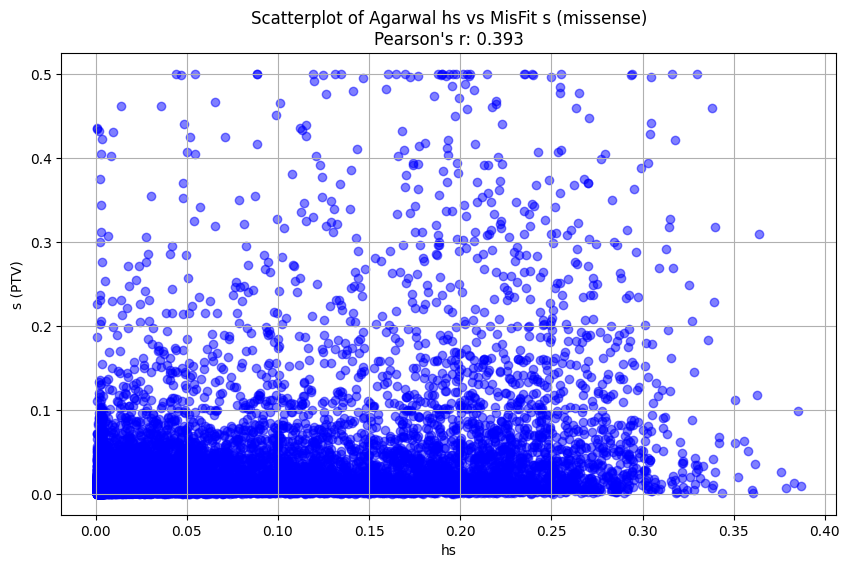

In [131]:
# Calculate Pearson's correlation coefficient
r_value, p_value = pearsonr(df_cleaned['mean'], df_cleaned['MisFit_sgene_mis'])
print(f"Pearson's r: {r_value}, p-value: {p_value}")

# GB(Prior) x gene_length scatter plot

fig5, ax5 = plt.subplots(figsize=(10, 6))
ax5.scatter(df_cleaned['mean'], df_cleaned['MisFit_sgene_mis'], color='blue', alpha=0.5)
ax5.set_title(f'Scatterplot of Agarwal hs vs MisFit s (missense)\nPearson\'s r: {r_value:.3f}')
ax5.set_xlabel('hs')
ax5.set_ylabel('s (PTV)')
ax5.grid(True)

GB_post_length = fig5

GB_post_length.canvas.draw()
plt.show()

Pearson's r: 0.6854578748617651, p-value: 0.0


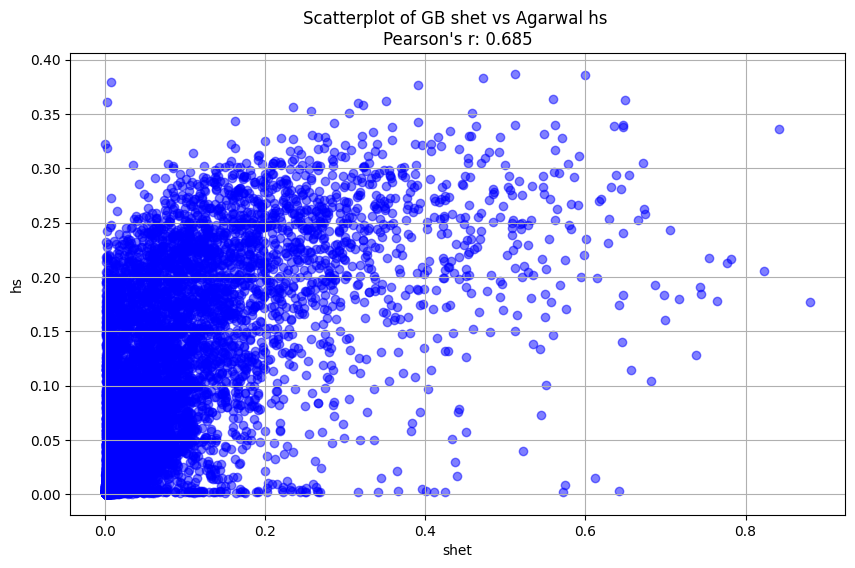

In [136]:
# Calculate Pearson's correlation coefficient
r_value, p_value = pearsonr(df_cleaned['post_mean'], df_cleaned['mean'])
print(f"Pearson's r: {r_value}, p-value: {p_value}")

# GB(shet) x Agarwal (hs) scatter plot

fig5, ax5 = plt.subplots(figsize=(10, 6))
ax5.scatter(df_cleaned['post_mean'], df_cleaned['mean'], color='blue', alpha=0.5)
ax5.set_title(f'Scatterplot of GB shet vs Agarwal hs \nPearson\'s r: {r_value:.3f}')
ax5.set_xlabel('shet')
ax5.set_ylabel('hs')
ax5.grid(True)

GB_post_length = fig5

GB_post_length.canvas.draw()
plt.show()

In [137]:
df.count()

hgnc_id              16229
symbol               16229
prior_mean           16229
post_mean            16229
post_lower_95        16229
post_upper_95        16229
unscaled_hpd_low     16229
unscaled_hpd_high    16229
unscaled_hpd_map     16229
log10_ci_low         16229
log10_ci_high        16229
log10_map            16229
mean                 16229
thickStart           16229
thickEnd             16229
pLI_score            16229
_zscore              16229
synonymous           16229
missense             16229
shet_pathogenic      16229
MisFit_sgene_mis     15766
MisFit_sgene_ptv     14519
gene_length          16229
pLI                  16229
mean_difference      16229
dtype: int64

In [146]:
mean_diff = df['mean_difference'].mean()
std_diff = df['mean_difference'].std()

threshold = mean_diff + 2 * std_diff

significant_genes = df[abs(df['mean_difference']) > threshold]

filtered_df = significant_genes[(significant_genes['post_mean'] > 0.1) & (significant_genes['mean'] < 0.1)]
sorted_filtered_df = filtered_df.sort_values(by='mean_difference', ascending=False)

sorted_filtered_df.head(10)

sorted_filtered_df.to_csv('focus_genes.tsv', sep='\t', index=False)

128


In [147]:
print(threshold)

0.12336730383085215


In [148]:
row_count = significant_genes.shape[0]
print(row_count)

1403


In [149]:
row_count = sorted_filtered_df.shape[0]
print(row_count)

128


In [151]:
new_df = sorted_filtered_df

Pearson's r: -0.007401084986261519, p-value: 0.9339203680611139


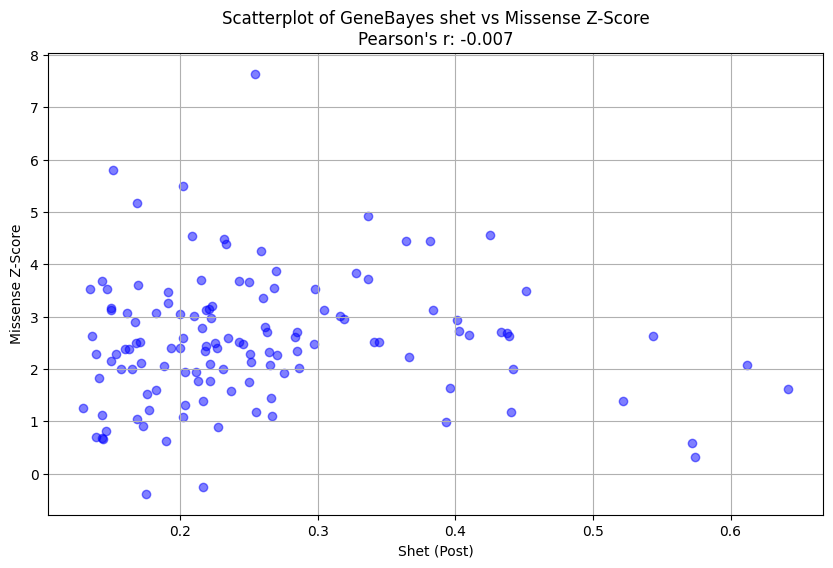

In [155]:
# Focus Genes Correlation
r_value, p_value = pearsonr(new_df['post_mean'], new_df['_zscore'])
print(f"Pearson's r: {r_value}, p-value: {p_value}")

fig2, ax2 = plt.subplots(figsize=(10, 6))
ax2.scatter(new_df['post_mean'], new_df['_zscore'], color='blue', alpha=0.5)
ax2.set_title(f'Scatterplot of GeneBayes shet vs Missense Z-Score\nPearson\'s r: {r_value:.3f}')
ax2.set_xlabel('Shet (Post)')
ax2.set_ylabel('Missense Z-Score')
ax2.grid(True)

GB_post_missense = fig2

GB_post_missense.canvas.draw()
plt.show()

Pearson's r: 0.5208680715344141, p-value: 0.0


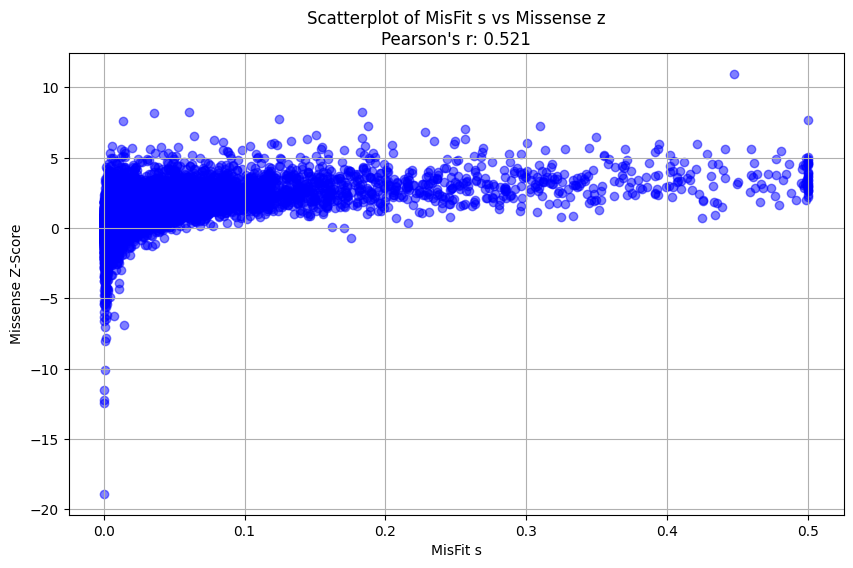

In [163]:
# Focus Genes Correlation
r_value, p_value = pearsonr(df_cleaned['MisFit_sgene_mis'], df_cleaned['_zscore'])
print(f"Pearson's r: {r_value}, p-value: {p_value}")

fig2, ax2 = plt.subplots(figsize=(10, 6))
ax2.scatter(df_cleaned['MisFit_sgene_mis'], df_cleaned['_zscore'], color='blue', alpha=0.5)
ax2.set_title(f'Scatterplot of MisFit s vs Missense z\nPearson\'s r: {r_value:.3f}')
ax2.set_xlabel('MisFit s')
ax2.set_ylabel('Missense Z-Score')
ax2.grid(True)

GB_post_missense = fig2

GB_post_missense.canvas.draw()
plt.show()

In [16]:
df_filtered = df.dropna(subset=['post_mean', 'mean', 'MisFit_sgene_ptv'])
count = df_filtered.shape[0]

print(f"Number of genes in set: {count}")
df_filtered['s_het_mis_ptv_diff'] = df_filtered['post_mean'] - df_filtered['MisFit_sgene_ptv']
df_filtered['hs_mis_ptv_diff'] = df_filtered['mean'] - df_filtered['MisFit_sgene_ptv']

s_het_mis_ptv_mean = df_filtered['s_het_mis_ptv_diff'].mean()
hs_mis_ptv_std = df_filtered['hs_mis_ptv_diff'].mean()
s_het_mis_ptv_std = df_filtered['s_het_mis_ptv_diff'].std()
hs_mis_ptv_std = df_filtered['hs_mis_ptv_diff'].std()

# Define the threshold as, say, 2 standard deviations away from the mean
s_het_mis_ptv_threshold = s_het_mis_ptv_mean + 2 * s_het_mis_ptv_std
hs_mis_ptv_threshold = s_het_mis_ptv_mean + 2 * hs_mis_ptv_std

print(s_het_mis_ptv_threshold)
print(hs_mis_ptv_threshold)

s_het_significant = df_filtered[abs(df_filtered['s_het_mis_ptv_diff']) > s_het_mis_ptv_threshold]
hs_significant = df_filtered[abs(df_filtered['hs_mis_ptv_diff']) > hs_mis_ptv_threshold]

num_s_het_significant = s_het_significant.shape[0]
num_hs_significant = hs_significant.shape[0]

print(f"Number of genes with significant difference in s_het-mis_ptv: {num_s_het_significant}")
print(f"Number of genes with significant difference in hs-mis_ptv: {num_hs_significant}")

Number of genes in set: 14519
0.1788250137629946
0.16383335410155295
Number of genes with significant difference in s_het-mis_ptv: 646
Number of genes with significant difference in hs-mis_ptv: 1248


/var/folders/80/bplr3t355sl19sxgt1s4p27m0000gq/T/ipykernel_73102/2561903706.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['s_het_mis_ptv_diff'] = df_filtered['post_mean'] - df_filtered['MisFit_sgene_ptv']
/var/folders/80/bplr3t355sl19sxgt1s4p27m0000gq/T/ipykernel_73102/2561903706.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['hs_mis_ptv_diff'] = df_filtered['mean'] - df_filtered['MisFit_sgene_ptv']
